In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

from NonparametricLogisticRegression import NonparametricLogisticRegression
from Splines import Splines

from sklearn.linear_model import LogisticRegression, Ridge, Lasso
import warnings

In [2]:
X = np.linspace(1,10,20)
# X = np.vstack([X+5,X+7,X+21,X,X,X,X,X,X,X,X,X,X,X+1,X,X,X,X,X,X,X]).T

In [3]:
y = np.array([1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1])

### Simple Logistic Regression + Splines and Regularization

In [4]:
# basis functions from splines
X = Splines(knots=X).N(X)

In [5]:
# model = NonparametricLogisticRegression(l=100,alpha=0.01,iters=1200)
model = LogisticRegression(C=10)

try:
    # with splines
    model.fit(X,y)
except:
    # without splines
    model.fit(X.reshape(-1,1),y)

C:\Users\Anatoly\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
model.coef_

array([[ 1.46411   , -1.38404974, -1.69287697, -0.76521845,  0.44165312,
         1.40465087,  1.73604934,  1.38716841,  0.69194213, -0.09703989,
        -0.84491476, -1.4494779 , -1.8020813 , -1.77896076, -1.34773614,
        -0.82551778, -0.37825843, -0.07804984]])

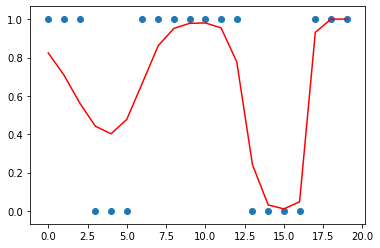

In [7]:
# plt.scatter(X,y)
try:
    # with splines
    plt.plot(model.predict_proba(X)[:,1], color='red')
except:
    # without splines
    plt.plot(model.predict_proba(X.reshape(-1,1))[:,1], color='red')
plt.scatter(np.arange(len(y)),y)
plt.show()

### Nonparametric Logistic Regression

In [2]:
X = np.linspace(1,10,20)
# X = np.vstack([X+5,X+7,X+21,X,X,X,X,X,X,X,X,X,X,X+1,X,X,X,X,X,X,X]).T

In [3]:
y = np.array([1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1])

In [4]:
# model = NonparametricLogisticRegression(l=100,alpha=0.01,iters=1200)
model = NonparametricLogisticRegression(l=0.1)

# with splines
model.fit(X,y)

AttributeError: 'Splines' object has no attribute 'knots'

In [5]:
model.theta

AttributeError: 'NonparametricLogisticRegression' object has no attribute 'theta'

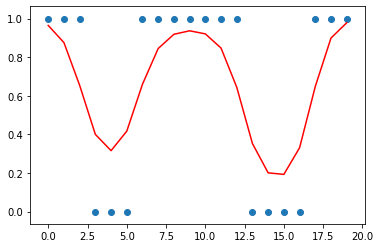

In [18]:
plt.plot(model.predict(X), color='red')

plt.scatter(np.arange(len(y)),y)
plt.show()

### LogisticGAM

In [6]:
from pygam import LogisticGAM

In [33]:
X = np.linspace(1,10,20)
# X = np.vstack([X+5,X+7,X+21,X,X,X,X,X,X,X,X,X,X,X+1,X,X,X,X,X,X,X]).T

In [34]:
y = np.array([1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,1,1,1])

In [35]:
gam = LogisticGAM(lam=1.5).fit(X, y)

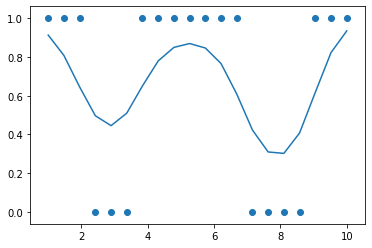

In [39]:
plt.plot(X,gam.predict_proba(X))

plt.scatter(X,y)
plt.show()

In [16]:
# model = NonparametricLogisticRegression(l=100,alpha=0.01,iters=1200)
model = NonparametricLogisticRegression(l=0.1)

# with splines
model.fit(X,y)

In [17]:
model.theta

array([[ 6.14482878],
       [-2.84720191],
       [-2.75837714],
       [-3.6464557 ],
       [ 4.55342748],
       [ 3.53597969],
       [ 4.26467913],
       [-3.21857399],
       [-1.34795422],
       [-0.64351153],
       [-0.45073791],
       [-0.50239105],
       [-0.8427921 ],
       [-1.69030714],
       [ 1.40689053],
       [ 0.58506161],
       [ 0.59352322],
       [ 0.27212776]])

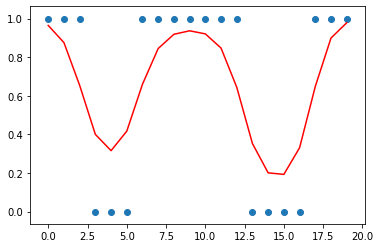

In [18]:
plt.plot(model.predict(X), color='red')

plt.scatter(np.arange(len(y)),y)
plt.show()